## Загрузка данных

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

Прочитаем и рассмотрим датасет.

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Рассмотрим общую информацию о датасете.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Рассмотрим все основные статистические характеристики датасета по каждому числовому признаку.

In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Рассмотрим количество пропусков в данных.

In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Определим количество дубликатов.

In [7]:
data.duplicated().sum()

153

Удалим дубликаты из датасета.

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Сбросим индексы.

In [9]:
data.reset_index(drop= True , inplace= True )
display(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4842,0,28.0,35700.0,2,0
4843,0,34.0,52400.0,1,0
4844,0,20.0,33900.0,2,0
4845,1,22.0,32700.0,3,0


Также рассмотрим гистограммы данных.

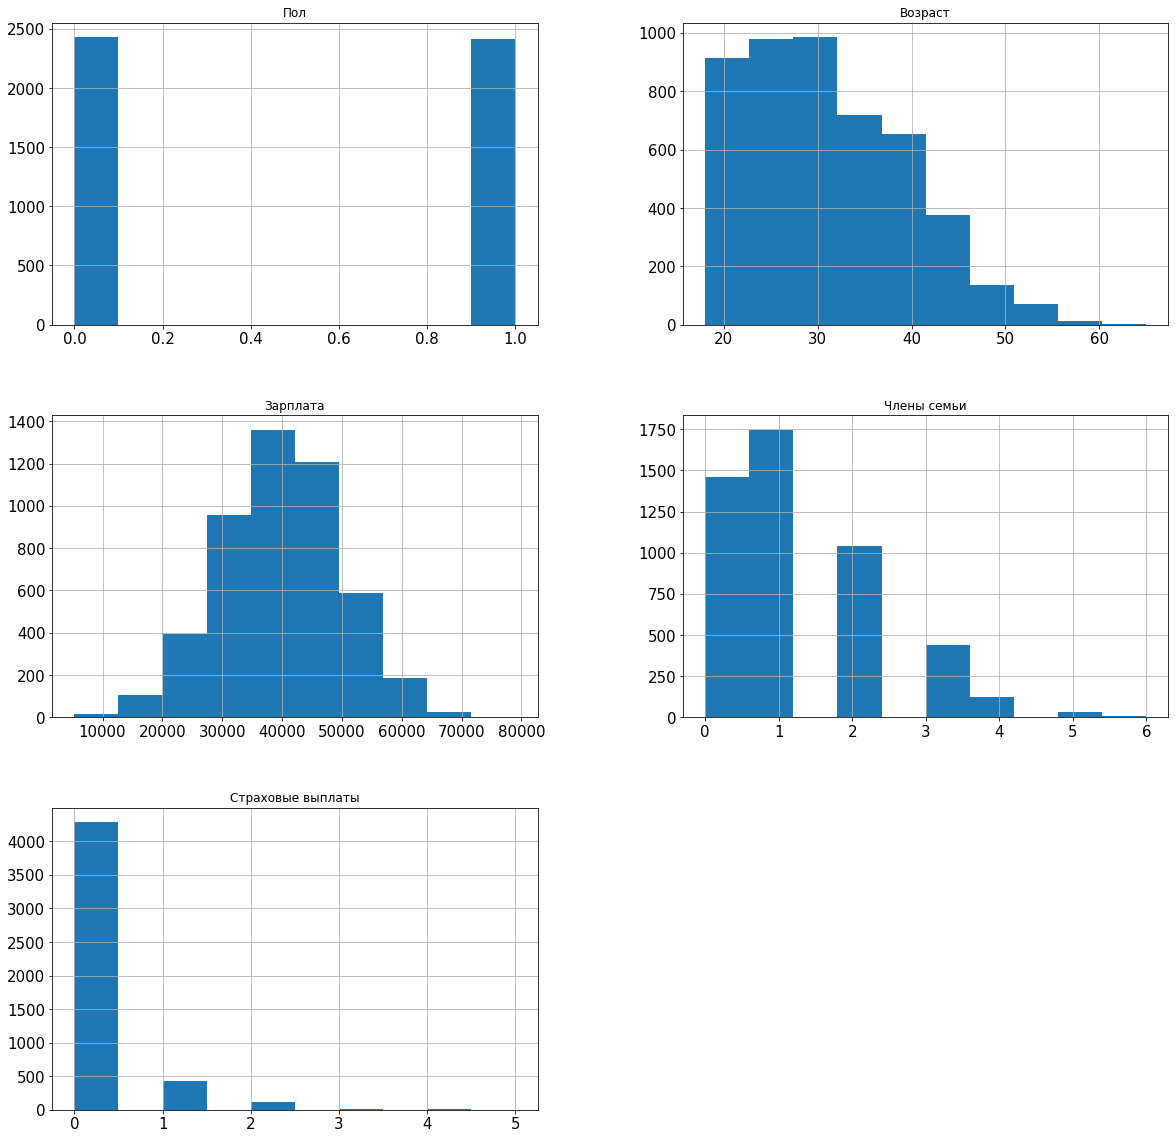

In [10]:
data.hist(xlabelsize = 15, 
          ylabelsize = 15, 
          figsize = [20, 20])
plt.show()

<b>Вывод:</b>
<br> Как можно заметить по гистограммам и статистическим характеристикам, в данным отсутствуют выбросы, аномальные значения, пропуски, а также были удалены дубликаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**


Умножим матрицу признаков на обратимую матрицу P:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y \tag 1
$$

Расскроем скобки в формуле обучения выше, используя свойство обратной матрицы: $ (AB)^T=B^T A^T $:

$$
w' = (P^T X^T XP)^{-1} P^T X^T y \tag 2
$$

Пусть $A=P^T$, $B=(X^TXP)$, тогда $(P^T(X^TXP))^{-1} = (X^TXP)^{-1} P^{T^{-1}}$, применив свойства единичной матрицы Е: $ A^{-1}A = E $ и $ AE = EA = A $:

$$
w' = (X^TXP)^{-1} X^T y \tag 3
$$

Пусть $A=X^TX$, $B=(P)$, тогда $(X^TXP)^{-1} = (P)^{-1}(X^TX)^{-1} $, тогда:

$$
w' = (P)^{-1}(X^TX)^{-1}X^T y \tag 4
$$

С учетом выражения $ a = Xw $ получим:

$$
a = (XP)(P)^{-1}(X^TX)^{-1}X^T y \tag 5
$$

С учетом свойств $ AA^{-1} = E $ и $ AE = EA = A $ и выражения $ w = (X^T X)^{-1} X^T y $: получим:

$$
a = Xw \tag 6
$$

**Обоснование:** 
На основании приведенных выше преобразований можно сделать вывод, что предсказания до преобразования равны предсказаниям после предсказания. Соответственно при умножении вектора признаков на обратимую матрицу и дальнешем поиске вектора весов, вектор предсказаний остается неизменным.

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма предлагаю использовать умножение матрицы признаков (данных) на обратимую матрицу. Данное действие позволит "зашифровать" данные пользователей, а также в конечном этоге, на основании вывода в шаге, не повлияет на вектор предсказаний. Сначала мы создадим функцию, аргументом этой функции будут признаки, в функции из рандомной матрицы выберет ту, которая является обратимой (обратимая матрица является обратимой когда она квадратная и её определитель не равен нулю). В дальнейшем будет умножение входных признаков на созданую обратимую матрицу. На выходе функции будет преобразованная или "зашифрованная" матрица, а также обратимая матрица, которую можно использовать для дешифрования или восстановления данных.

**Обоснование**

Обосноване для этого алгоритма служат обоснование в шаге 2.

## Проверка алгоритма

Создадим из датасета признаки и целевой признак.

In [11]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Создадим функцию для получения преобразованной и обратимой матриц.

In [12]:
def data_prot(features):
    n = features.shape[1]
    np.random.seed(seed = 12345)
    P = np.random.randint(10, size=(n, n))
    while np.linalg.det(P) == 0:
        P = np.random.randint(10, size=(n, n))
    protect_features = features.dot(P)
    return protect_features, P

Рассмотрим качество предсказания на непреобразованных признаках. 

In [13]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('{:.3f}'.format(r2_score(target, predictions)))

0.430


Рассмотрим качество предсказания на преобразованных признаках. 

In [14]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(data_prot(features)[0], target)
predictions = model.predict(data_prot(features)[0])
print('{:.3f}'.format(r2_score(target, predictions)))

0.430


Как можно заметить, качество предсказаний признаков до и после преобразования одинаково.

**Вывод**

В данном проекте было необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.
Необходимо было защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

Сперва были загружены и проверены данные. Было проверено отсутствие пропусков, наличие дубликатов, выбросов, аномалий. Были обнаружены дубликаты и удалены из датасета. С помощью линейный преобразований и свойста единичной, транспортируемой, обратной матриц был сделан вывод, что если признаки умножить на обратимую матрицу, то вектор предсказаний имеет такое же значение, что и без умножения. 

В дальнейшем был разработан алгоритм для создания преобразованной или "зашифрованной" матрицы с помощью которой будет создан и проверено качество предсказаний. Была создана функция, которая принимает в качестве аргумента признаки, а на возвращает преобразованную матрицу и обратимую матрицу. 

В результате качество предсказания непреобразованных и преобразованных признаков не отличаются.